> # Lab 5 (RNN) - Tesla



## Imports

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers.experimental.preprocessing import Normalization
import numpy as np
from keras import Sequential
from keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout, Conv1D, MaxPool1D, Flatten, InputLayer
from keras.losses import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from keras.optimizers import Adam, Adagrad, Adadelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive/')
!cp drive/MyDrive/ColabNotebooks/TSLA.csv .

Mounted at /content/drive/


## Load the data

In [4]:
data = pd.read_csv('TSLA.csv').drop(columns=['Adj Close'])

In [5]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,34608500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2748 non-null   object 
 1   Open    2748 non-null   float64
 2   High    2748 non-null   float64
 3   Low     2748 non-null   float64
 4   Close   2748 non-null   float64
 5   Volume  2748 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 128.9+ KB


In [7]:
data = data.set_index('Date')
data =data['Open']
data

Date
2010-06-30      5.158000
2010-07-01      5.000000
2010-07-02      4.600000
2010-07-06      4.000000
2010-07-07      3.280000
                 ...    
2021-05-24    581.599976
2021-05-25    607.309998
2021-05-26    607.559998
2021-05-27    620.239990
2021-05-28    628.500000
Name: Open, Length: 2748, dtype: float64

In [8]:
len(data.index) - len(data.index.unique())

0

In [9]:
data.isnull().unique()

array([False])

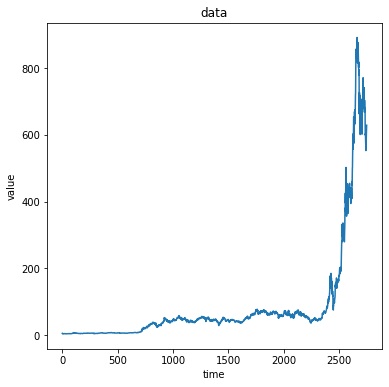

In [10]:
plt.figure(figsize = (6,6))
plt.plot(data.values)
plt.xlabel('time')
plt.ylabel('value')
plt.title('data')
plt.show();

In [11]:
data = data[650:]

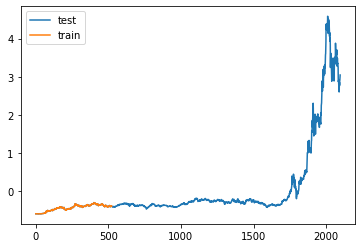

In [12]:
part = len(data) //4

scaler = Normalization()
scaler.adapt(data.values)
data_scaled = scaler(data)

plt.plot(data_scaled, label='test')
plt.plot(data_scaled[:part], label='train')
plt.legend();

In [13]:
def split(data, timestamps, y_len):
  n = len(data) - timestamps - y_len  + 1
  X = [data[i:i+timestamps] for i in range(n)]
  Y = [data[i:i+y_len] for i in range(timestamps, n+timestamps)]
  return np.array(X).reshape(-1, timestamps, 1), np.array(Y).reshape(-1, y_len)

In [14]:
def res(history, model):
  history = history.history

  plt.figure(figsize = (18, 6))
  
  plt.subplot(1,3,1)
  plt.plot(history['loss'], label = f"train: {history['loss'][-1]:.4f}")
  plt.plot(history['val_loss'], label=f"val: {history['val_loss'][-1]:.4f}")
  plt.title('MSE')
  plt.legend()

  plt.subplot(1,3,2)
  plt.plot(history['mae'], label = f"train: {history['mae'][-1]:.4f}")
  plt.plot(history['val_mae'], label=f"val: {history['val_mae'][-1]:.4f}")
  plt.title('MAE')
  plt.legend()

  plt.subplot(1,3,3)
  plt.plot(history['mape'], label = f"train: {history['mape'][-1]:.4f}")
  plt.plot(history['val_mape'], label=f"val: {history['val_mape'][-1]:.4f}")
  plt.title('MAPE')
  plt.legend()
  plt.show();

  train_pred = model.predict(X_train)
  val_pred = model.predict(X_val)

  plt.figure(figsize = (18, 6))
  plt.plot(np.vstack([y_train, y_val]), label="Real")
  plt.plot(np.vstack([train_pred, val_pred]), label="val_predict")
  plt.plot(train_pred, label="train_predict")
  plt.xlabel('time')
  plt.ylabel('value')
  plt.title('data')
  plt.legend()
  plt.show();

## Simple RNN

simple
timestamps = 64

In [84]:
timestamps=64
y_len=1

In [85]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

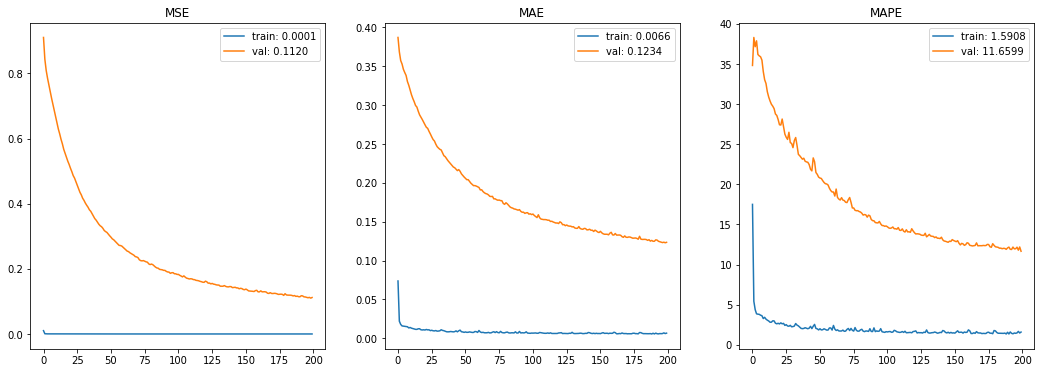

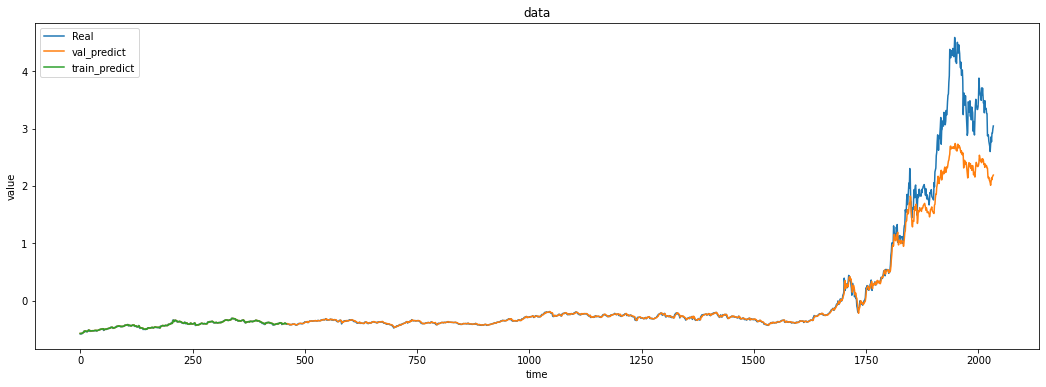

In [90]:
model1_1 = Sequential()
model1_1.add(InputLayer((None, 1)))
model1_1.add(SimpleRNN(64))
model1_1.add(Dense(1))
model1_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history1_1 = model1_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=200, verbose=0)
res(history1_1, model1_1)

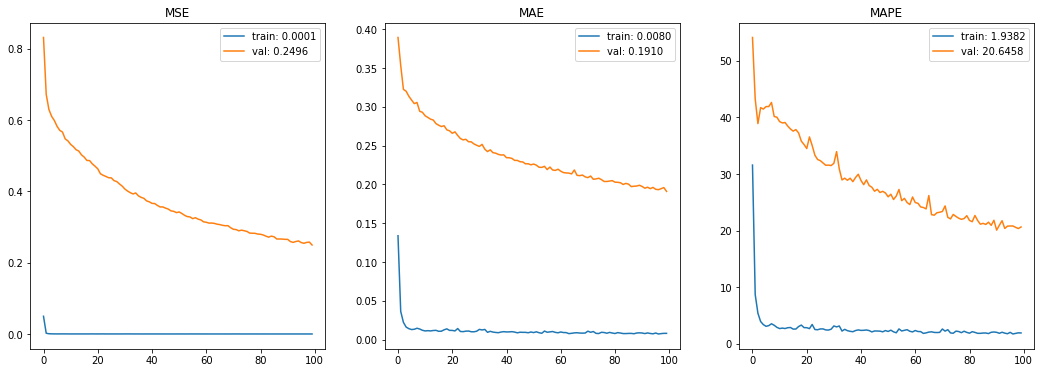

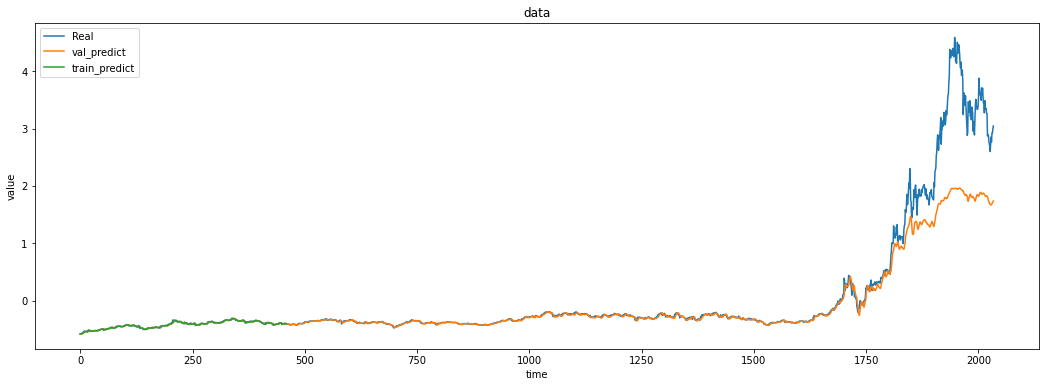

In [96]:
model1_2 = Sequential()
model1_2.add(InputLayer((None, 1)))
model1_2.add(SimpleRNN(128))
model1_2.add(Dense(1))
model1_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history1_2 = model1_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, verbose=0)
res(history1_2, model1_2)

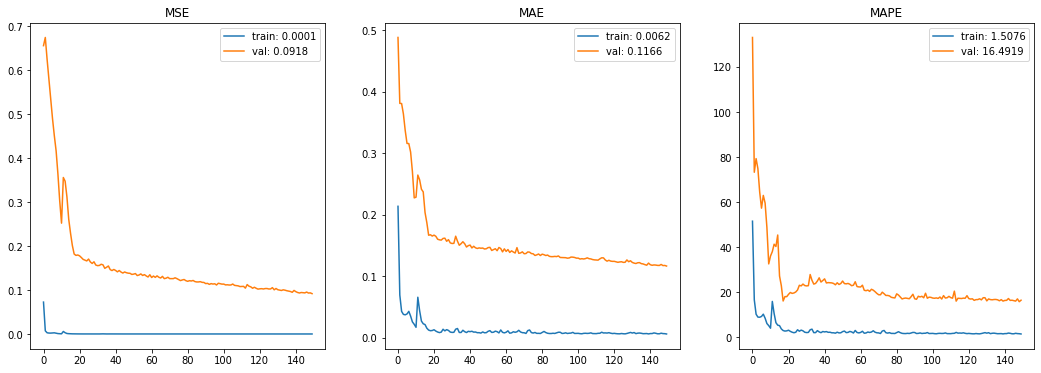

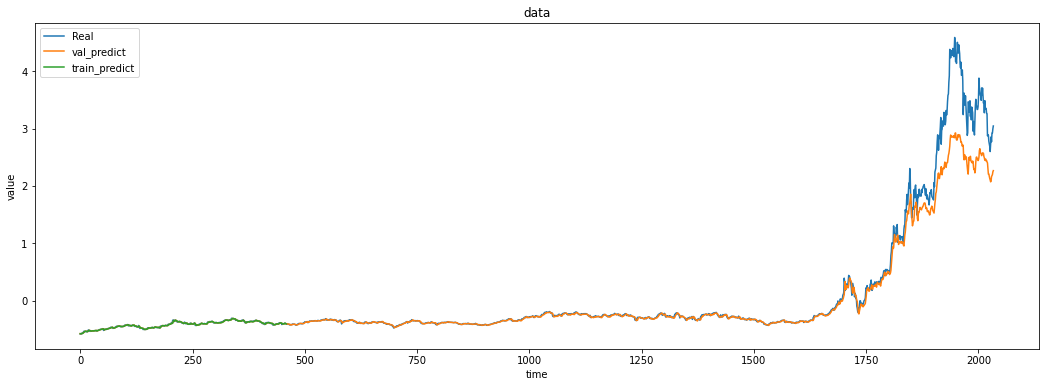

In [97]:
model1_3 = Sequential()
model1_3.add(InputLayer((None, 1)))
model1_3.add(SimpleRNN(256))
model1_3.add(Dense(1))
model1_3.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history1_3 = model1_3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=150, verbose=0)
res(history1_3, model1_3)

simple timestamps = 32

In [98]:
timestamps=32
y_len=1

In [99]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

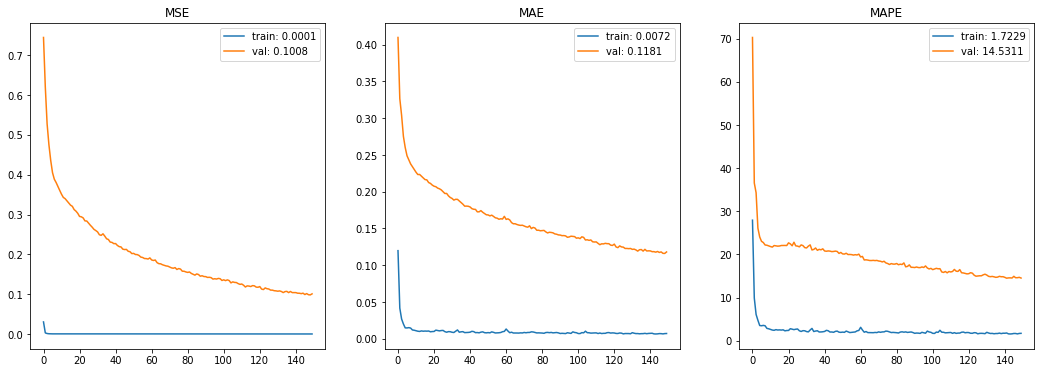

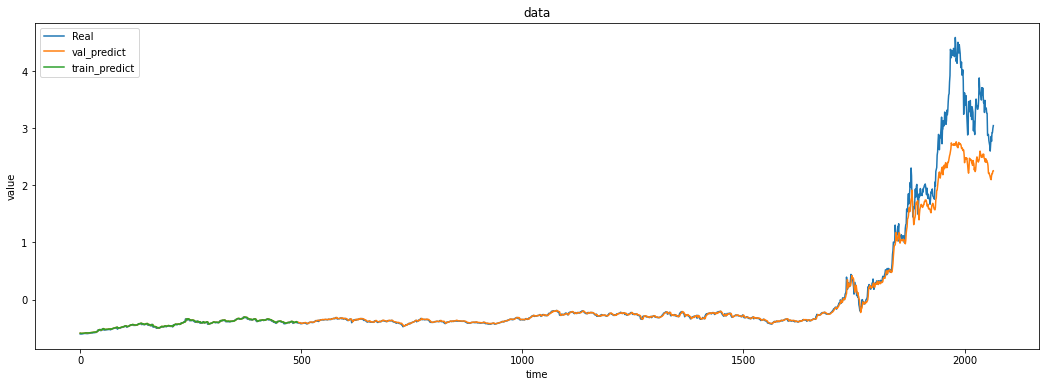

In [101]:
model2_1 = Sequential()
model2_1.add(InputLayer((None, 1)))
model2_1.add(SimpleRNN(128))
model2_1.add(Dense(1))
model2_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history2_1 = model2_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=150, verbose=0)
res(history2_1, model2_1)

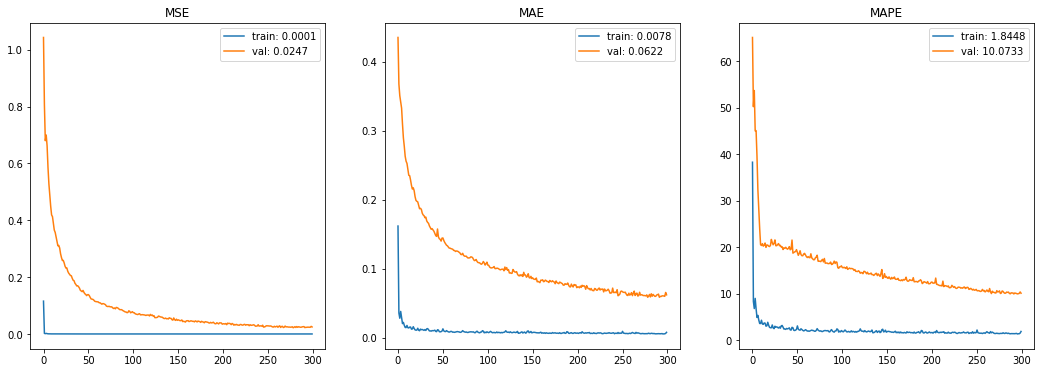

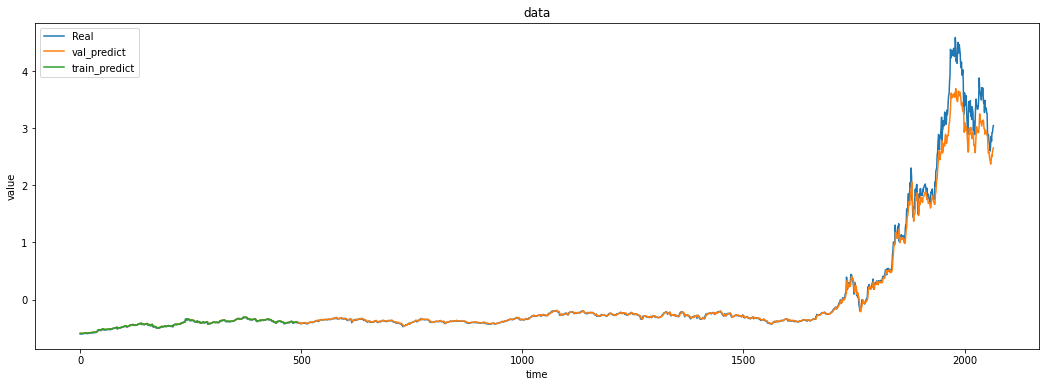

In [106]:
model2_2 = Sequential()
model2_2.add(InputLayer((None, 1)))
model2_2.add(SimpleRNN(256))
model2_2.add(Dense(1))
model2_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history2_2 = model2_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=300, verbose=0)
res(history2_2, model2_2)

In [133]:
timestamps=16
y_len=1

In [134]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

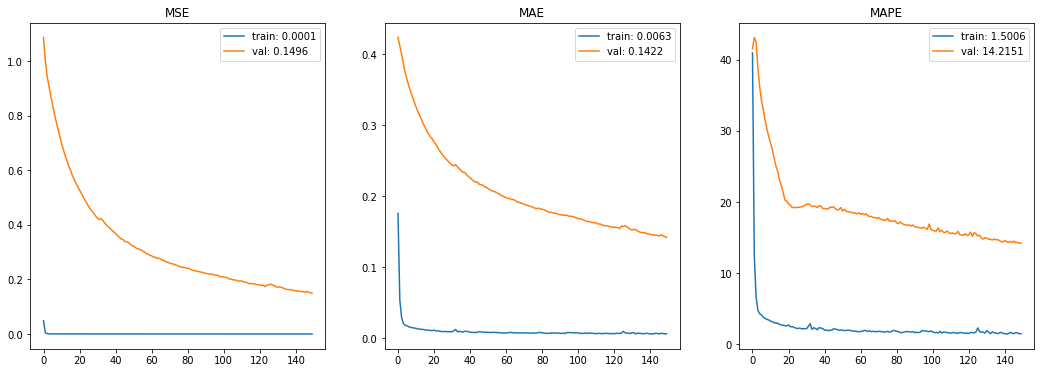

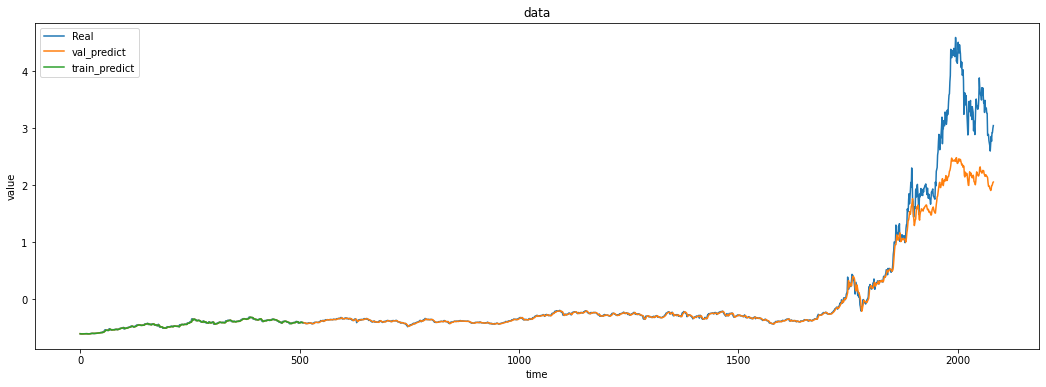

In [109]:
model3_1 = Sequential()
model3_1.add(InputLayer((None, 1)))
model3_1.add(SimpleRNN(128))
model3_1.add(Dense(1))
model3_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history3_1 = model3_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=150, verbose=0)
res(history3_1, model3_1)

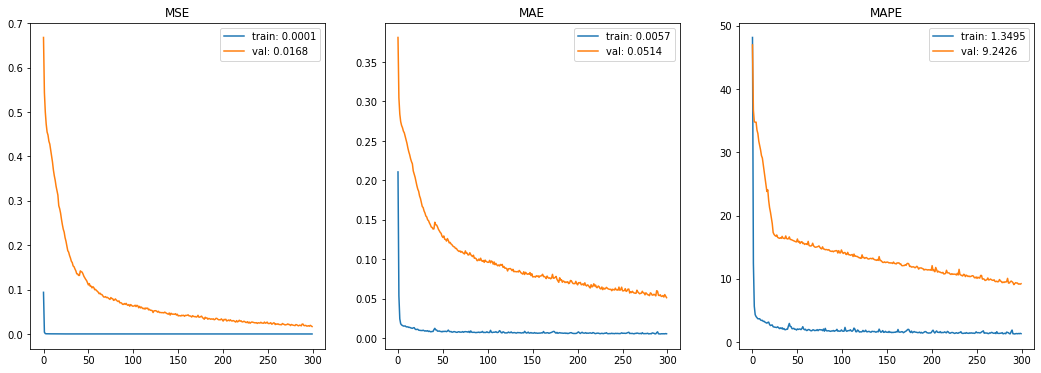

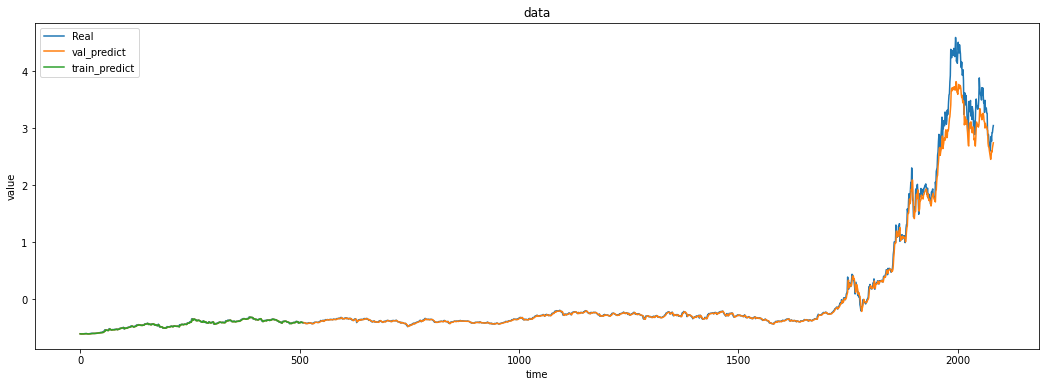

In [111]:
model3_2 = Sequential()
model3_2.add(InputLayer((None, 1)))
model3_2.add(SimpleRNN(256))
model3_2.add(Dense(1))
model3_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history3_2 = model3_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=300, verbose=0)
res(history3_2, model3_2)

In [127]:
timestamps=8
y_len=1

In [128]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

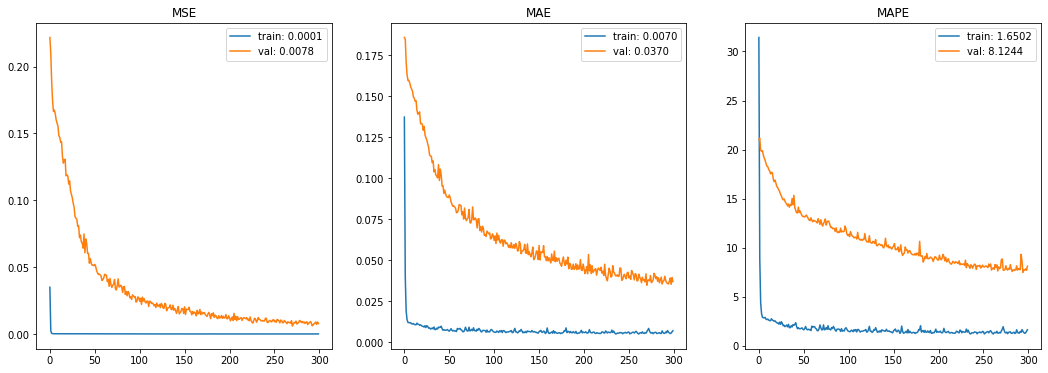

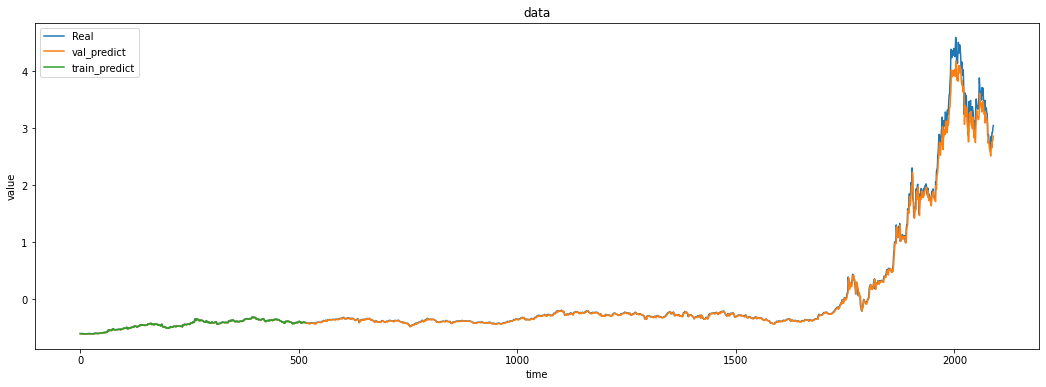

In [124]:
model4_1 = Sequential()
model4_1.add(InputLayer((None, 1)))
model4_1.add(SimpleRNN(256))
model4_1.add(Dense(1))
model4_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history4_1 = model4_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=300, verbose=0)
res(history4_1, model4_1)

## LSTM

In [136]:
timestamps=32
y_len=1

In [137]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

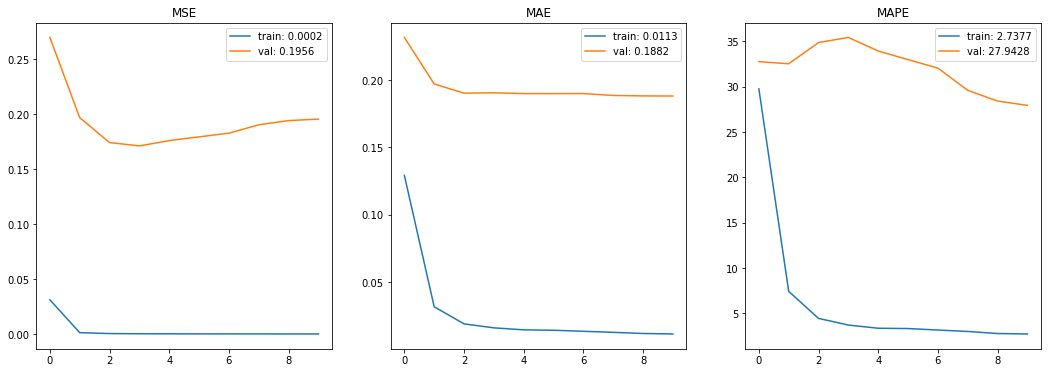

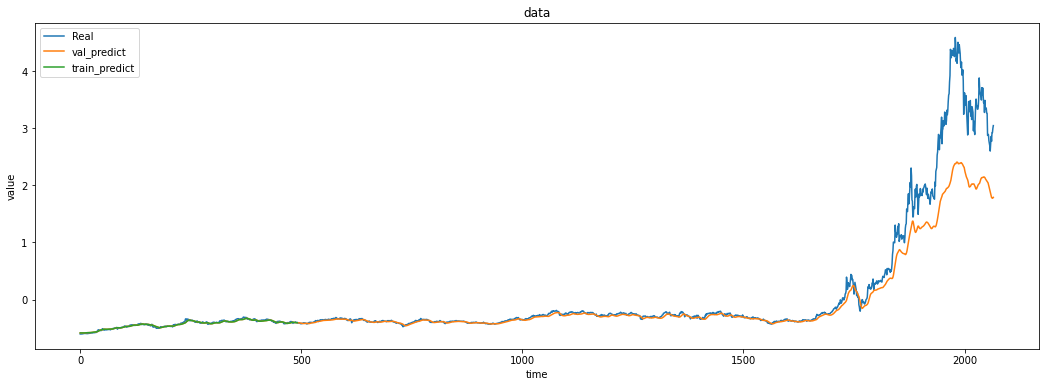

In [60]:
model5_1 = Sequential()
model5_1.add(InputLayer((None, 1)))
model5_1.add(LSTM(218))
model5_1.add(Dense(1))
model5_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history5_1 = model5_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=0)
res(history5_1, model5_1)

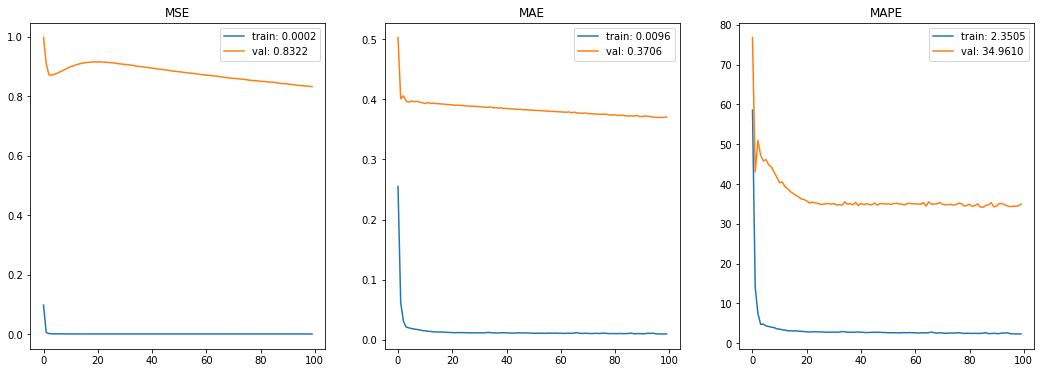

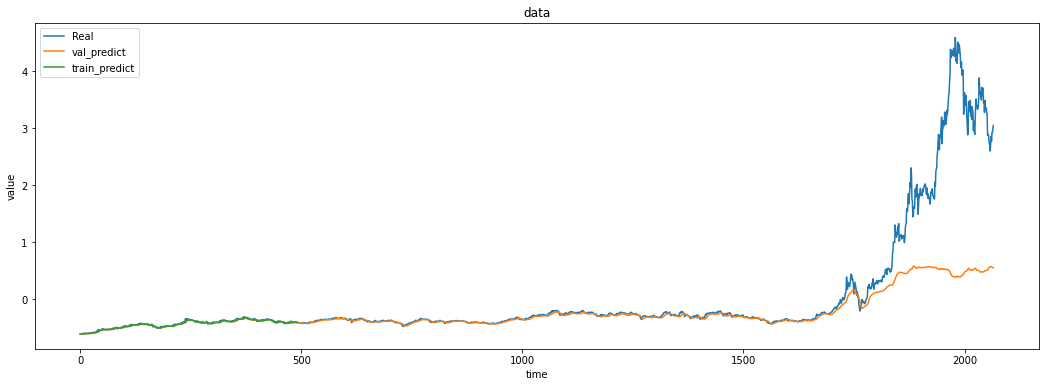

In [138]:
model5_2 = Sequential()
model5_2.add(InputLayer((None, 1)))
model5_2.add(LSTM(64))
model5_2.add(Dense(1))
model5_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history5_2 = model5_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, verbose=0)
res(history5_2, model5_2)

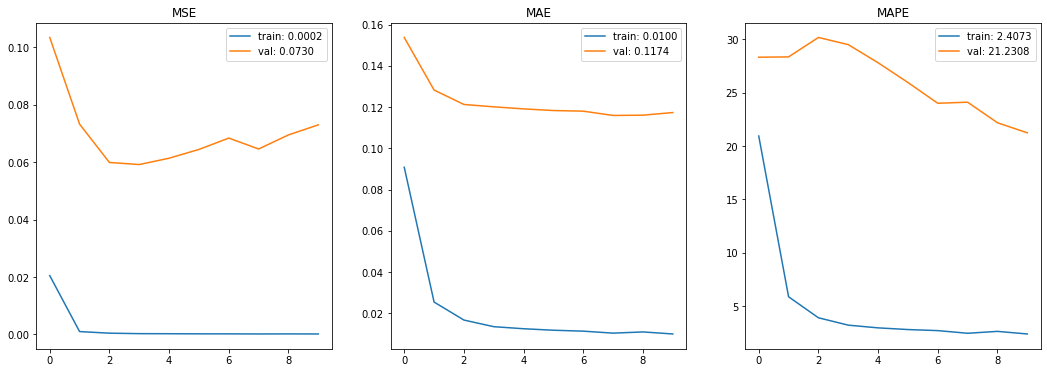

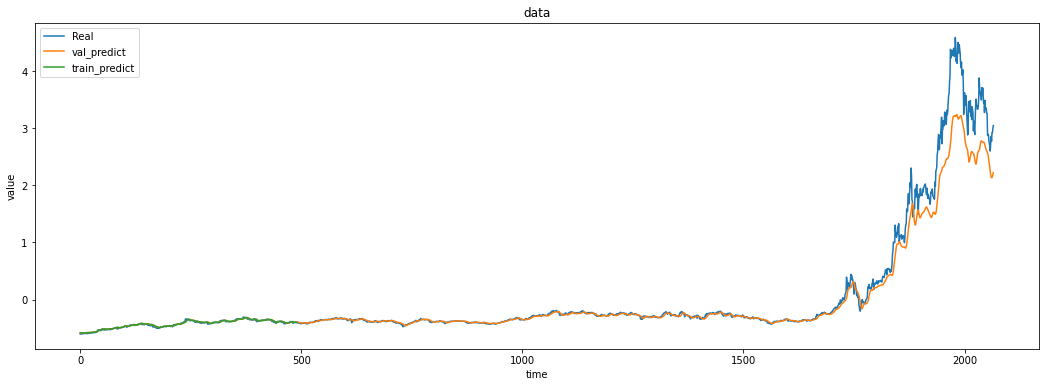

In [140]:
model5_3 = Sequential()
model5_3.add(InputLayer((None, 1)))
model5_3.add(LSTM(512))
model5_3.add(Dense(1))
model5_3.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history5_3 = model5_3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=0)
res(history5_3, model5_3)

## GRU

In [155]:
timestamps=32
y_len=1

In [156]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

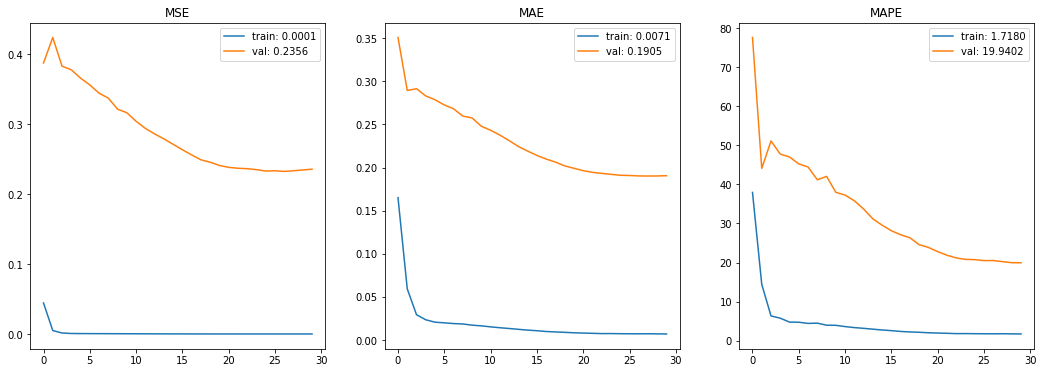

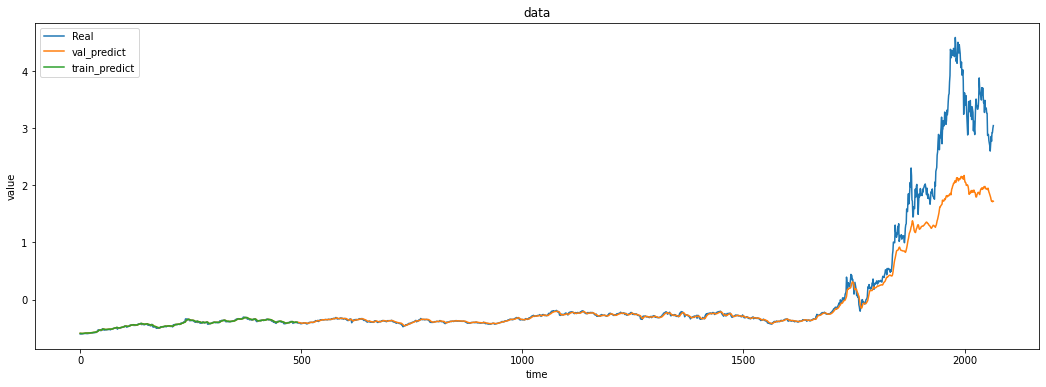

In [73]:
model6_1 = Sequential()
model6_1.add(InputLayer((None, 1)))
model6_1.add(GRU(64))
model6_1.add(Dense(1))
model6_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history6_1 = model6_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, verbose=0)
res(history6_1, model6_1)

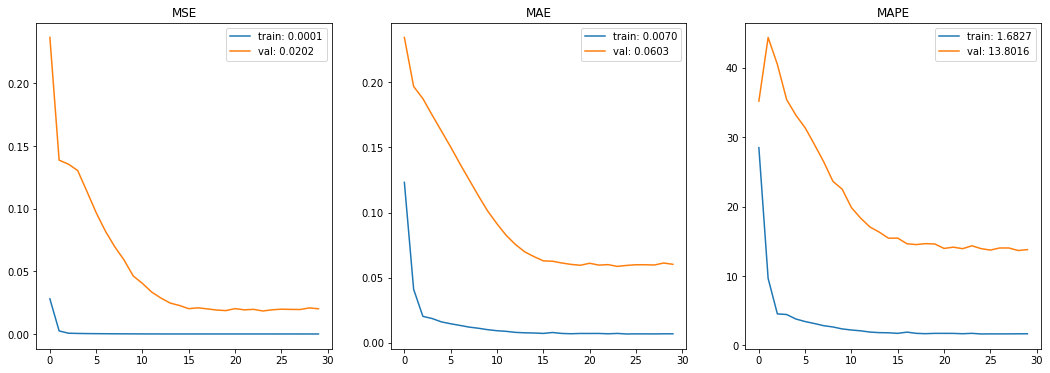

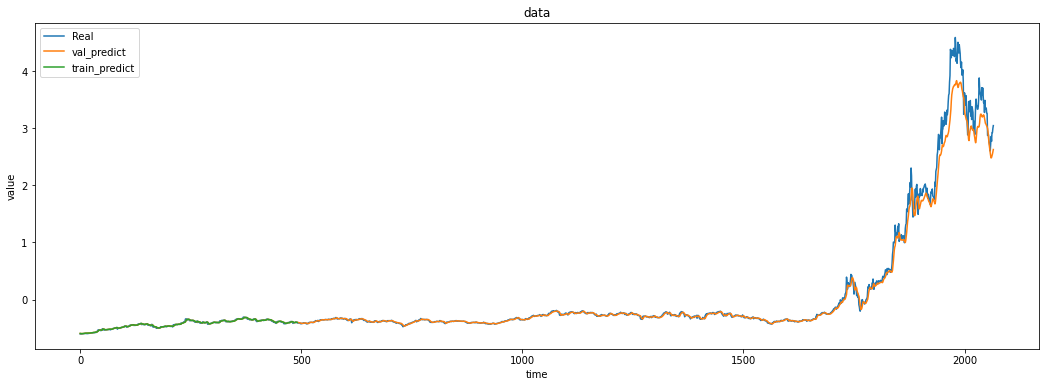

In [157]:
model6_3 = Sequential()
model6_3.add(InputLayer((None, 1)))
model6_3.add(GRU(256))
model6_3.add(Dense(1))
model6_3.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history6_3 = model6_3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, verbose=0)
res(history6_3, model6_3)

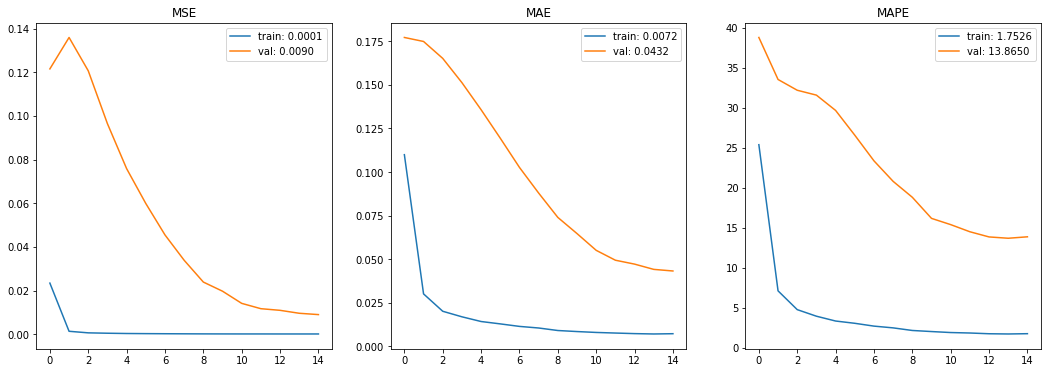

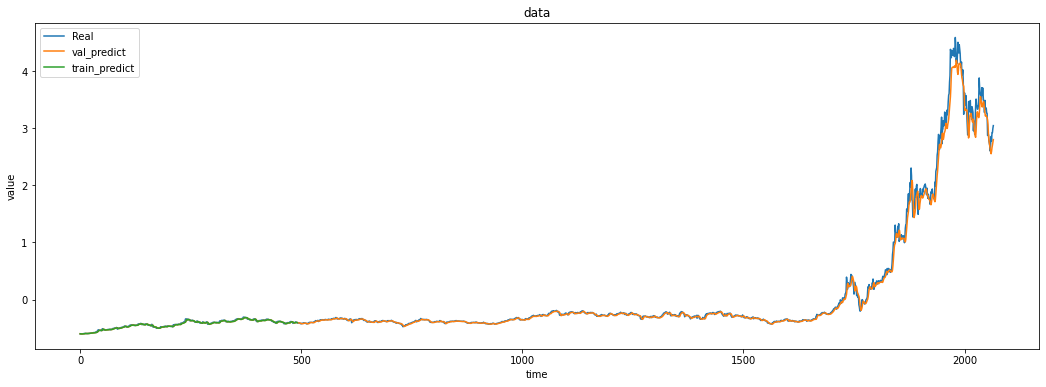

In [158]:
model6_4 = Sequential()
model6_4.add(InputLayer((None, 1)))
model6_4.add(GRU(512))
model6_4.add(Dense(1))
model6_4.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history6_4 = model6_4.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=15, verbose=0)
res(history6_4, model6_4)

## Deep LSTM

In [185]:
timestamps=16
y_len=1

In [186]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

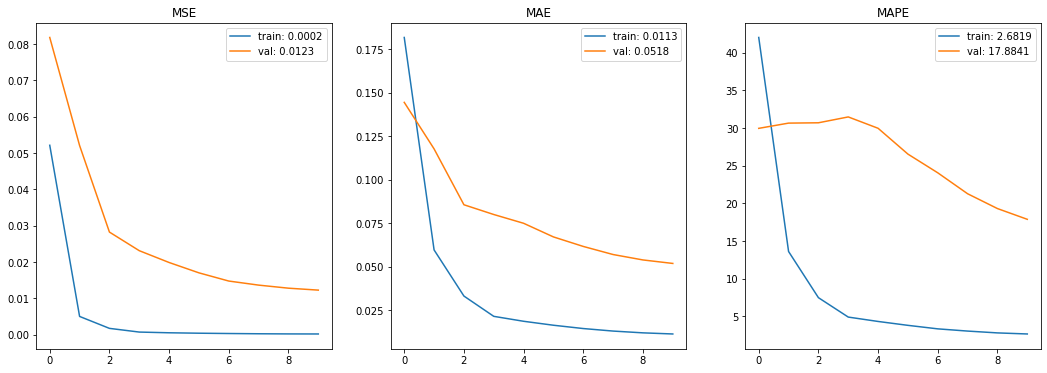

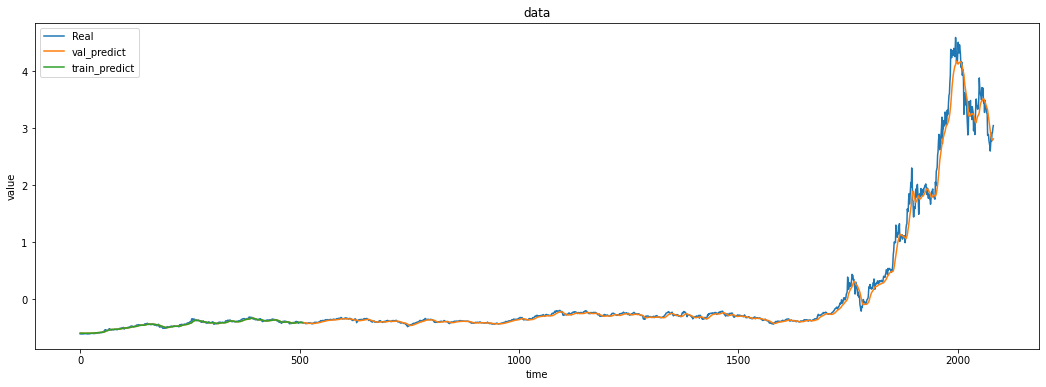

In [189]:
model7_1 = Sequential()
model7_1.add(InputLayer((None, 1)))
model7_1.add(LSTM(512, return_sequences=True))
model7_1.add(LSTM(512))
model7_1.add(Dense(1))
model7_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history7_1 = model7_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=0)
res(history7_1, model7_1)

In [194]:
timestamps=4
y_len=1

In [195]:
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

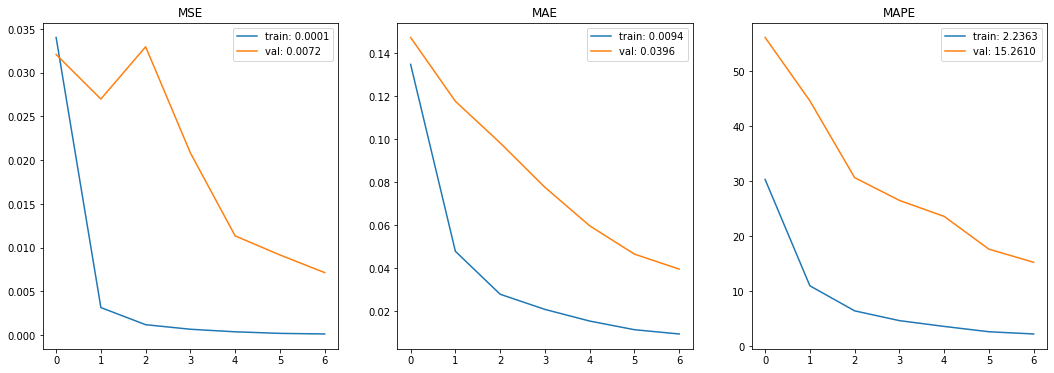

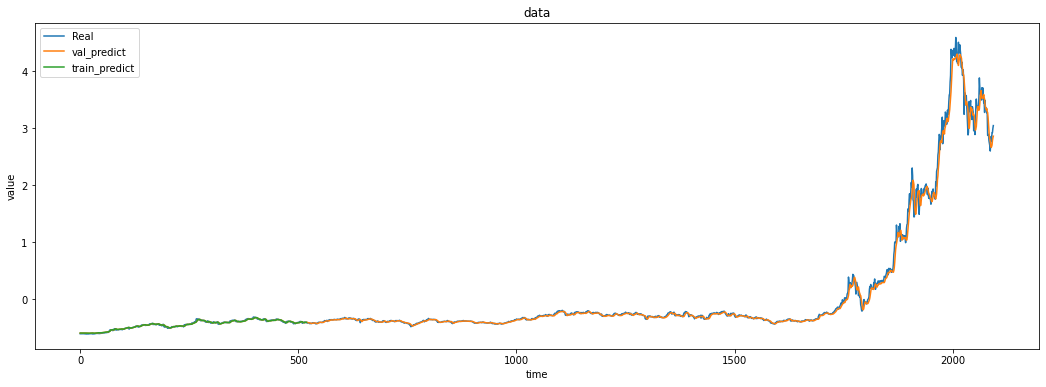

In [197]:
model7_2 = Sequential()
model7_2.add(InputLayer((None, 1)))
model7_2.add(LSTM(512, return_sequences=True))
model7_2.add(LSTM(512))
model7_2.add(Dense(1))
model7_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history7_2 = model7_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=7, verbose=0)
res(history7_2, model7_2)

## Deep GRU

In [209]:
timestamps=32
y_len=1
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

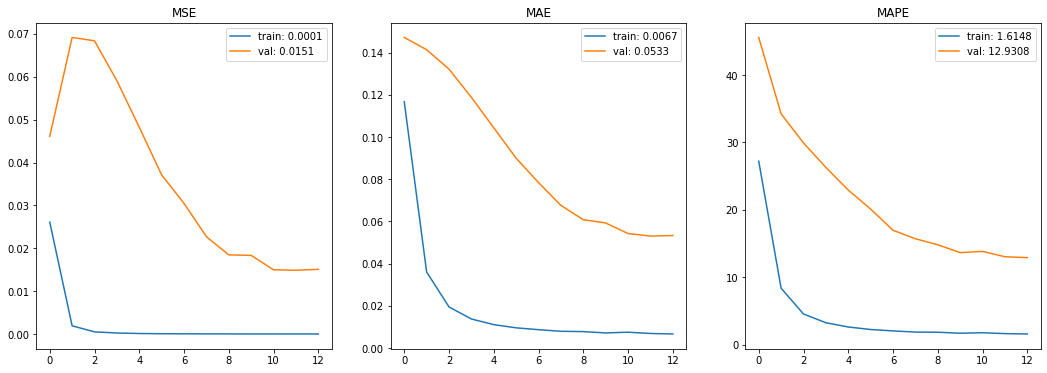

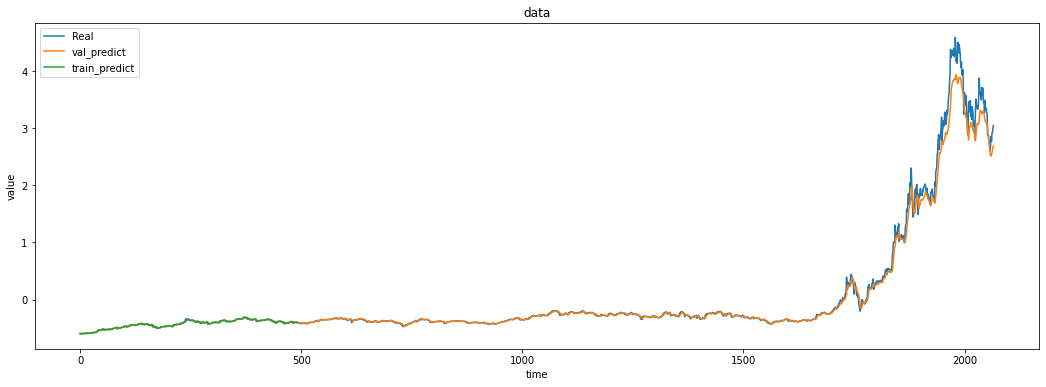

In [219]:
model8_1 = Sequential()
model8_1.add(InputLayer((None, 1)))
model8_1.add(GRU(256, return_sequences=True))
model8_1.add(GRU(256))
model8_1.add(Dense(1))
model8_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history8_1 = model8_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=13, verbose=0)
res(history8_1, model8_1)

In [236]:
timestamps=2
y_len=1
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

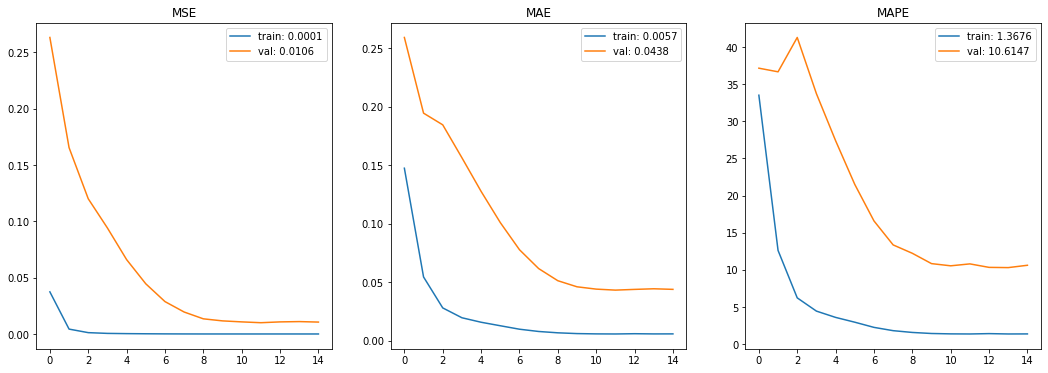

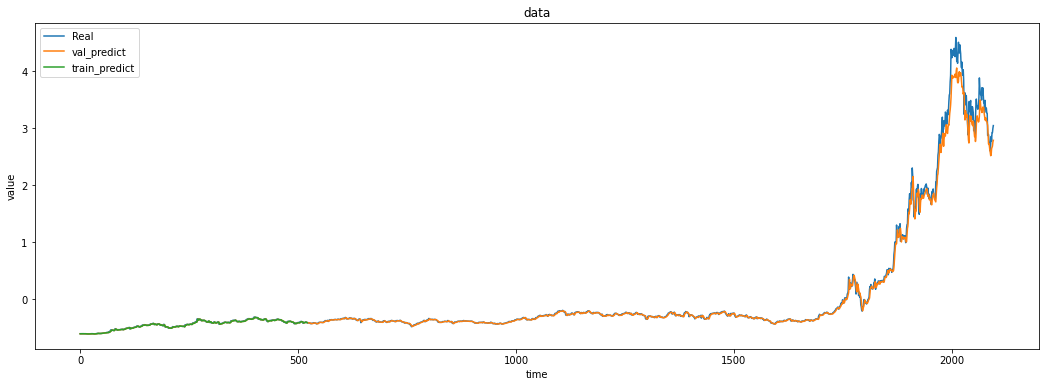

In [237]:
model8_2 = Sequential()
model8_2.add(InputLayer((None, 1)))
model8_2.add(GRU(256, return_sequences=True))
model8_2.add(GRU(256))
model8_2.add(Dense(1))
model8_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history8_2 = model8_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=15, verbose=0)
res(history8_2, model8_2)

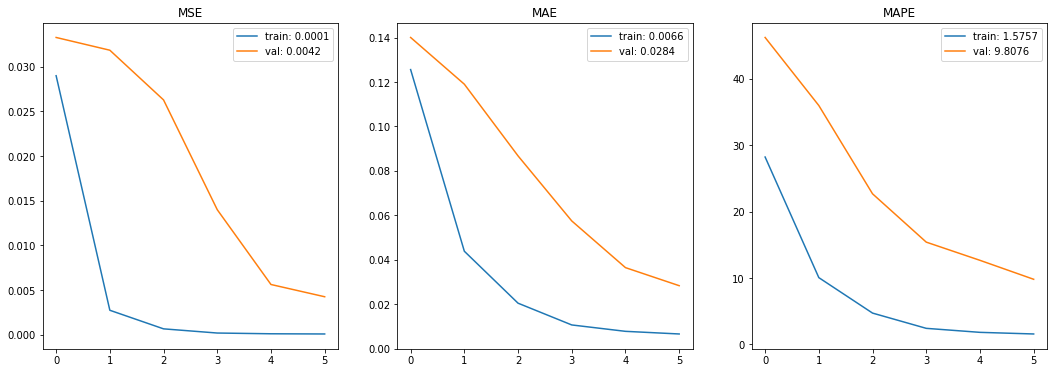

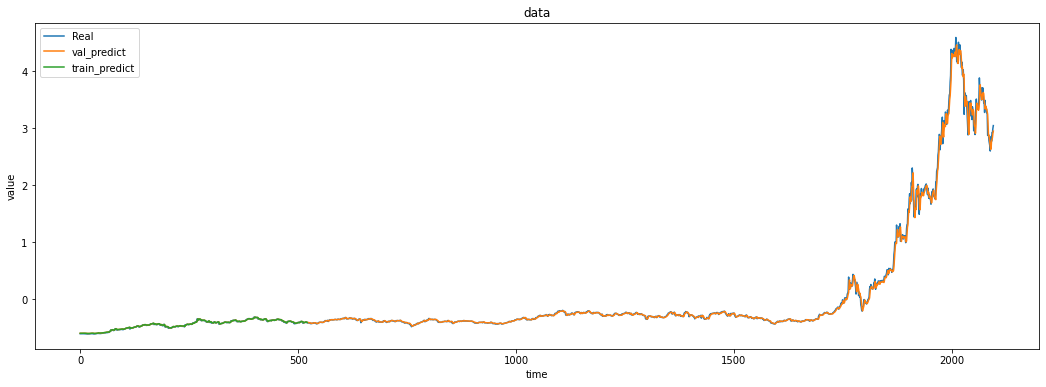

In [240]:
model8_3 = Sequential()
model8_3.add(InputLayer((None, 1)))
model8_3.add(GRU(512, return_sequences=True))
model8_3.add(GRU(512))
model8_3.add(Dense(1))
model8_3.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history8_3 = model8_3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=6, verbose=0)
res(history8_3, model8_3)

## LSTM + Dropout

In [249]:
timestamps=4
y_len=1
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

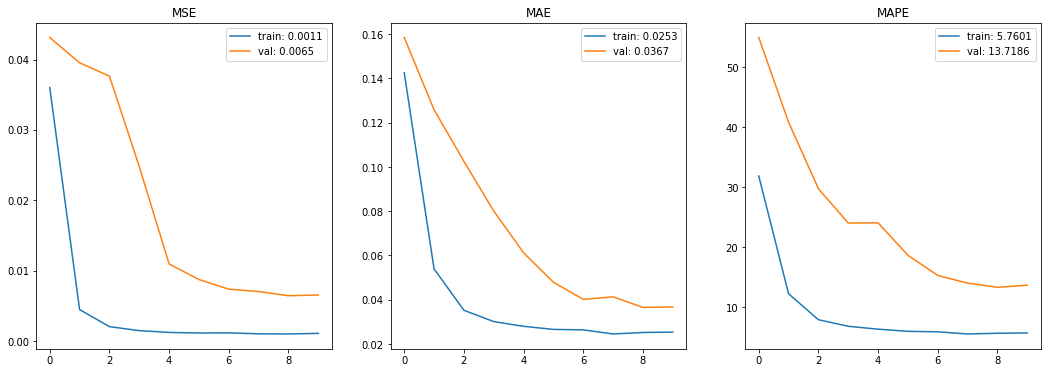

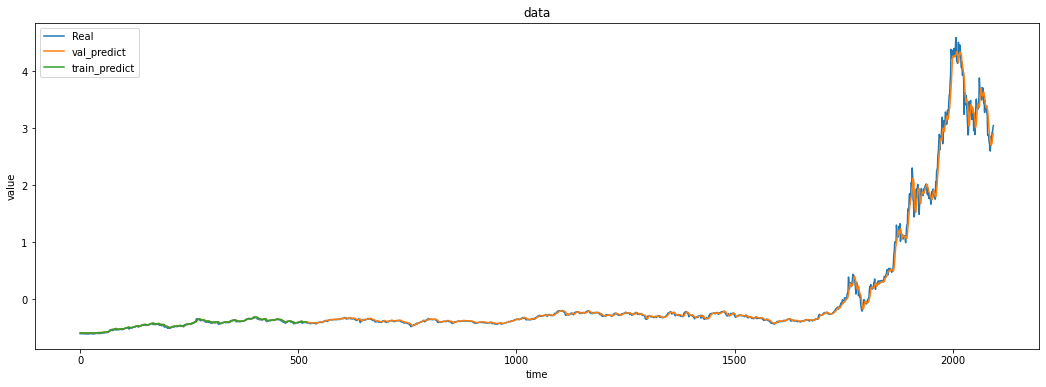

In [264]:
model9_1 = Sequential()
model9_1.add(InputLayer((None, 1)))
model9_1.add(LSTM(512, return_sequences=True))
model9_1.add(Dropout(0.2))
model9_1.add(LSTM(512))
model9_1.add(Dropout(0.6))
model9_1.add(Dense(1))
model9_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history9_1 = model9_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=0)
res(history9_1, model9_1)

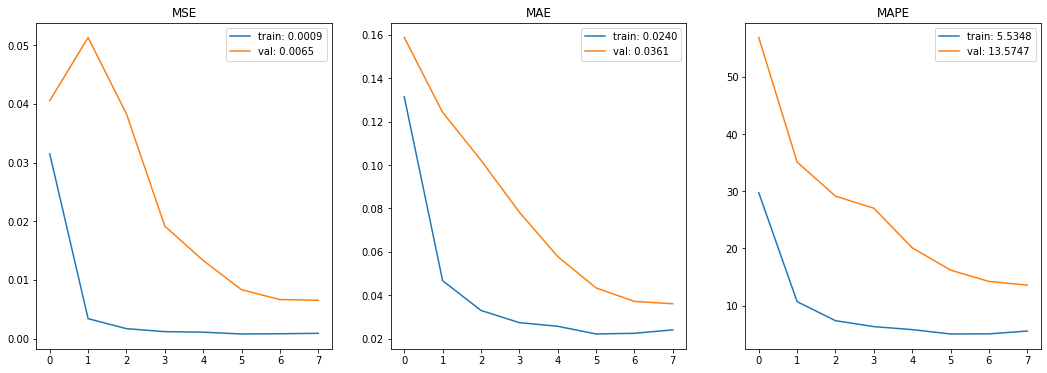

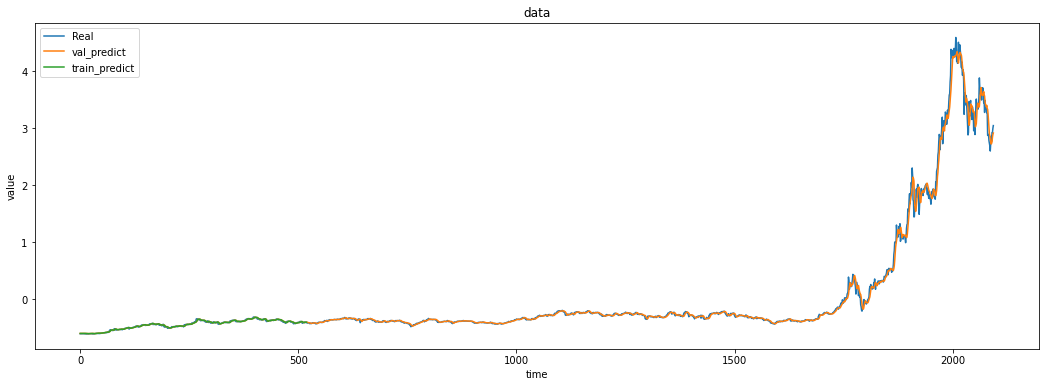

In [256]:
model9_2 = Sequential()
model9_2.add(InputLayer((None, 1)))
model9_2.add(LSTM(512, return_sequences=True))
model9_2.add(Dropout(0.2))
model9_2.add(LSTM(512))
model9_2.add(Dropout(0.5))
model9_2.add(Dense(1))
model9_2.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history9_2 = model9_2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=8, verbose=0)
res(history9_2, model9_2)

## GRU + Dropout


In [269]:
timestamps=2
y_len=1
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

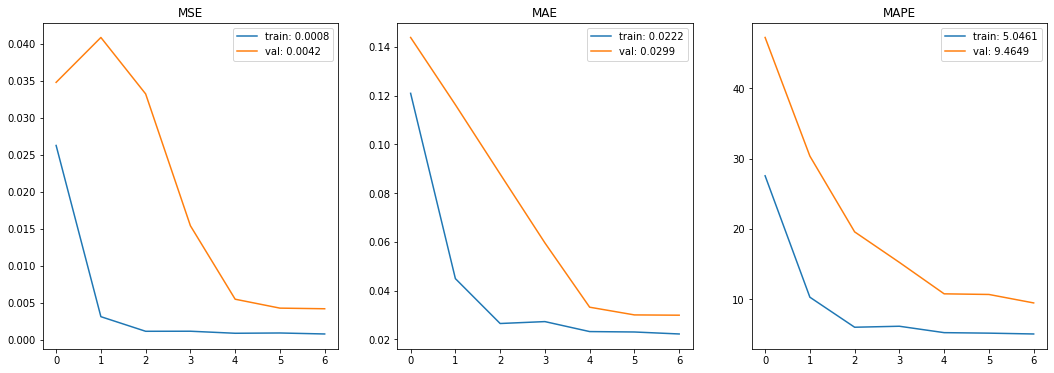

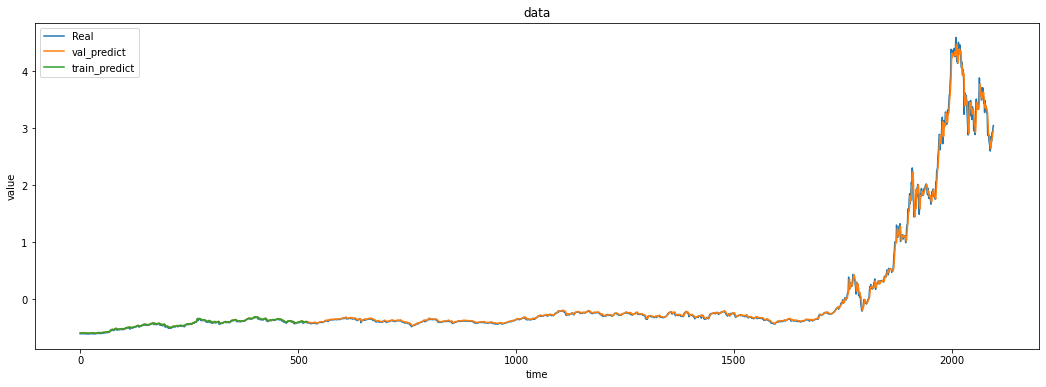

In [273]:
model10_1 = Sequential()
model10_1.add(InputLayer((None, 1)))
model10_1.add(GRU(512, return_sequences=True))
model10_1.add(Dropout(0.2))
model10_1.add(GRU(512))
model10_1.add(Dropout(0.5))
model10_1.add(Dense(1))
model10_1.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[ MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history10_1 = model10_1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=7, verbose=0)
res(history10_1, model10_1)

## Convolution

In [294]:
timestamps=4
y_len=1
X_train, y_train = split(data_scaled[:part], timestamps, y_len)
X_val, y_val = split(data_scaled[part-timestamps: ], timestamps, y_len)

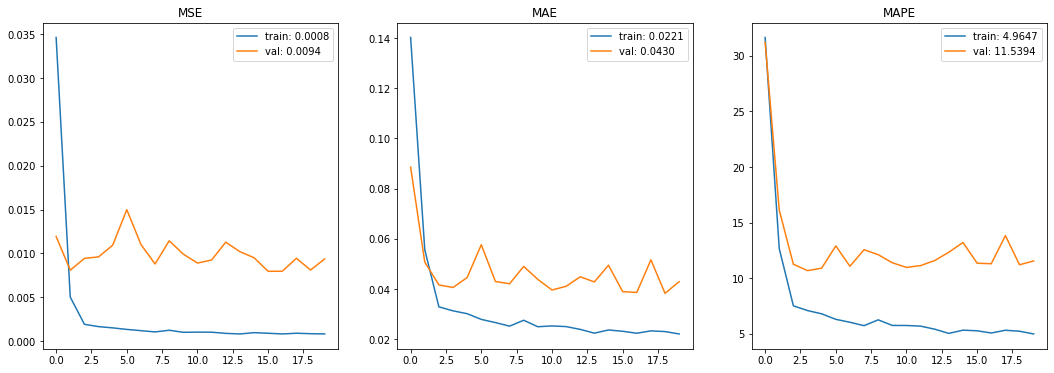

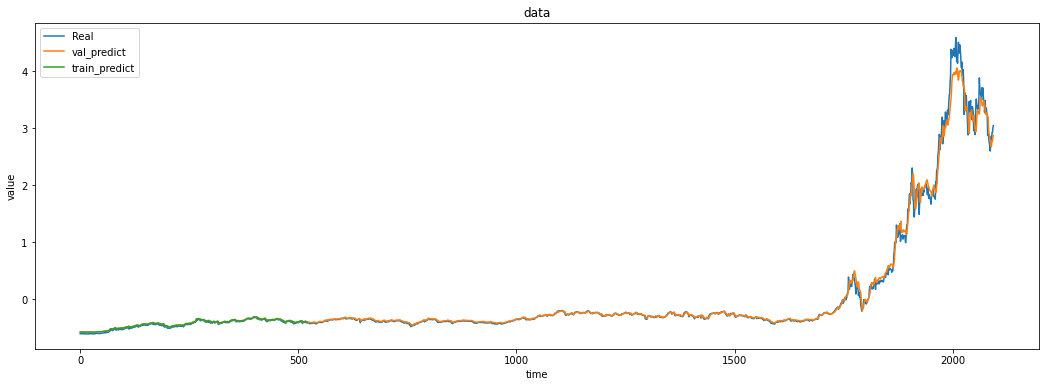

In [305]:
model11 = Sequential()
model11.add(InputLayer((4, 1)))
model11.add(Conv1D(256, 2, 1, padding='same', activation='tanh'))
model11.add(MaxPool1D(2))
model11.add(Dropout(0.2))
model11.add(Conv1D(512, 2, 1, padding='same', activation='tanh'))
model11.add(MaxPool1D(2))
model11.add(Dropout(0.5))
model11.add(Flatten())
model11.add(Dense(1))
model11.compile(loss = MeanSquaredError(name='mse'), optimizer = Adam(), metrics=[MeanAbsoluteError(name='mae'), MeanAbsolutePercentageError(name = 'mape')])
history11 = model11.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=20, verbose=0)
res(history11, model11)

## PACF

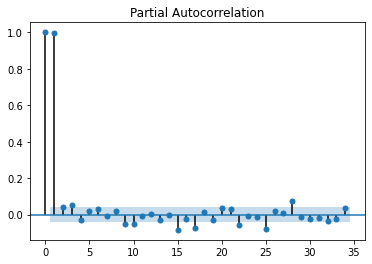

In [17]:
plot_pacf(data);

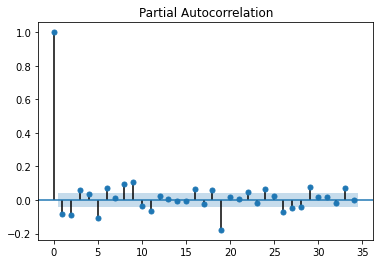

In [18]:
plot_pacf(data.diff()[1:]);